In [1]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

from qiskit.quantum_info import Statevector
from numpy import sqrt



In [2]:
from sympy.physics.quantum.qubit import Qubit, measure_all,  measure_partial
from sympy.physics.quantum.gate import H,X,Z,Y,T,I
from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.qubit import IntQubit
from sympy.physics.quantum.qubit import Qubit

## Qubit Tunggal

[1.+0.j,0.+0.j]

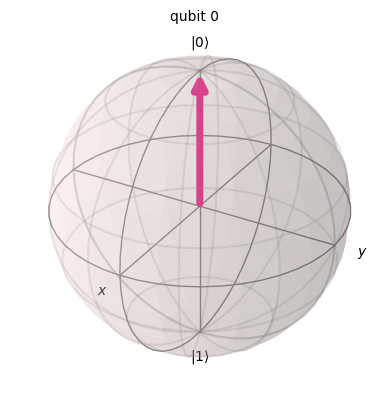

[0.+0.j,1.+0.j]

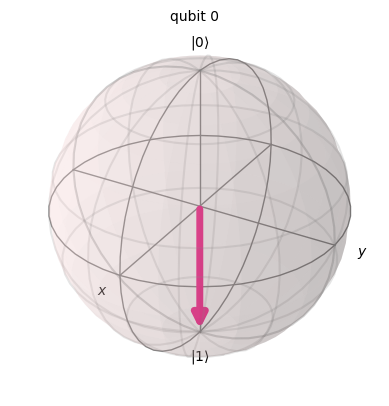

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

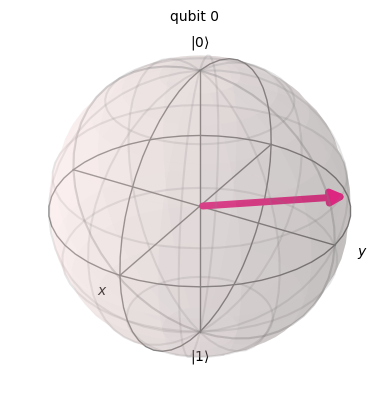

In [3]:
q1 = Statevector([1, 0])                 # Prob |0> = 1        prob |1> = 0
q2 = Statevector([0, 1])                 # Prob |0> = 0        prob |1> = 1
q3 = Statevector([(1+2.j)/3, -2/3])      # Prob |0> = 5/9      prob |1> = 4/9


display(q1.draw('text'))    
display(plot_bloch_multivector(q1))

display(q2.draw('text'))
display(plot_bloch_multivector(q2))

display(q3.draw('text'))
display(plot_bloch_multivector(q3))

#display(plot_state_city(q1))
#display(plot_state_qsphere(q1))
#display(plot_state_hinton(q1))
#display(plot_state_paulivec(q1))



<IPython.core.display.Latex object>

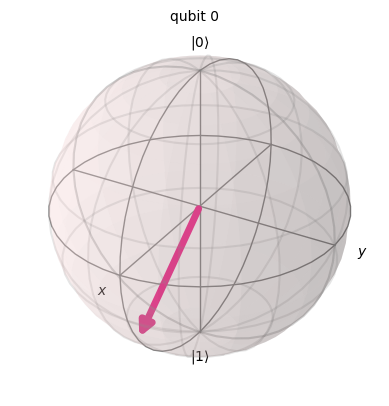

In [4]:
q4 = Statevector([1/sqrt(5), 2/sqrt(5)]) # Prob |0> = 1/5      prob |1> = 4/5
display(q4.draw('latex'))
display(plot_bloch_multivector(q4))

#q5 = Statevector([1/sqrt(2), 1/sqrt(2)]) # Prob |0> = 1/2      prob |1> = 1/2
#display(q5.draw('latex'))
#display(plot_bloch_multivector(q5))

In [5]:
# menguji apakah q4 adalah vektor state (jumlah kuadrat koefisiennya = 1)
display(q4.is_valid())

True

In [6]:
#q6 = Statevector.from_label('+')
#display(q6.draw('latex'))

#q7 = Statevector.from_label('-')
#display(q7.draw('latex'))

#q8 = Statevector.from_label('0')
#display(q8.draw('text'))

#q9 = Statevector.from_label('1')
#display(q9.draw('text'))

#q10 = Statevector.from_label('r')
#display(q10.draw('latex'))

#q11 = Statevector.from_label('l')
#display(q11.draw('latex'))

## Pengukuran status Qubit Tunggal

In [7]:
# Probabilitas status |0> dan status |1>
q = Statevector([1/sqrt(5), 2/sqrt(5)]) # Prob |0> = 1/5      prob |1> = 4/5
display(q.draw('latex'))
probs = q.probabilities()
print('Probabilitas:', probs)
print('probabilitas status |0> = ',np.round(probs[0],1))
print('probabilitas status |1> = ',np.round(probs[1],1))

<IPython.core.display.Latex object>

Probabilitas: [0.2 0.8]
probabilitas status |0> =  0.2
probabilitas status |1> =  0.8


<IPython.core.display.Latex object>

{'0': 217, '1': 783}

Pengukuran 1000 kali
probabilitas status |0> =  0.2    Jumlah kemunculan : 217
probabilitas status |1> =  0.8    Jumlah kemunculan : 783


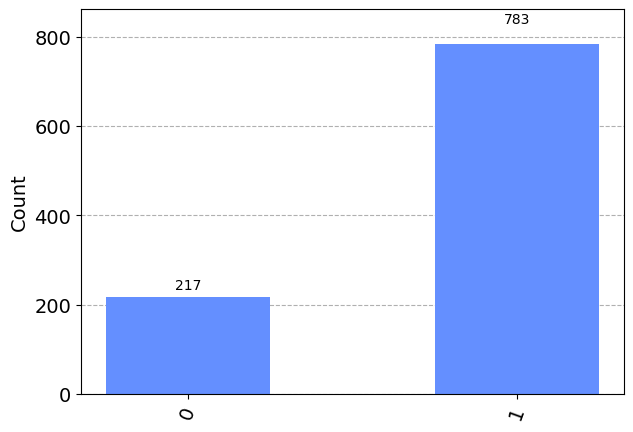

In [8]:
# pengukuran status Qubit dilakukan 1000 kali
# ========================================
q = Statevector([1/sqrt(5), 2/sqrt(5)]) # Prob |0> = 1/5      prob |1> = 4/5
display(q.draw('latex'))
probs = q.probabilities()
statistics1 = q.sample_counts(1000)
display(statistics1)
print('Pengukuran 1000 kali')
print('probabilitas status |0> = ',np.round(probs[0],1), '   Jumlah kemunculan :',statistics1['0'])
print('probabilitas status |1> = ',np.round(probs[1],1), '   Jumlah kemunculan :',statistics1['1'])
plot_histogram(statistics1)


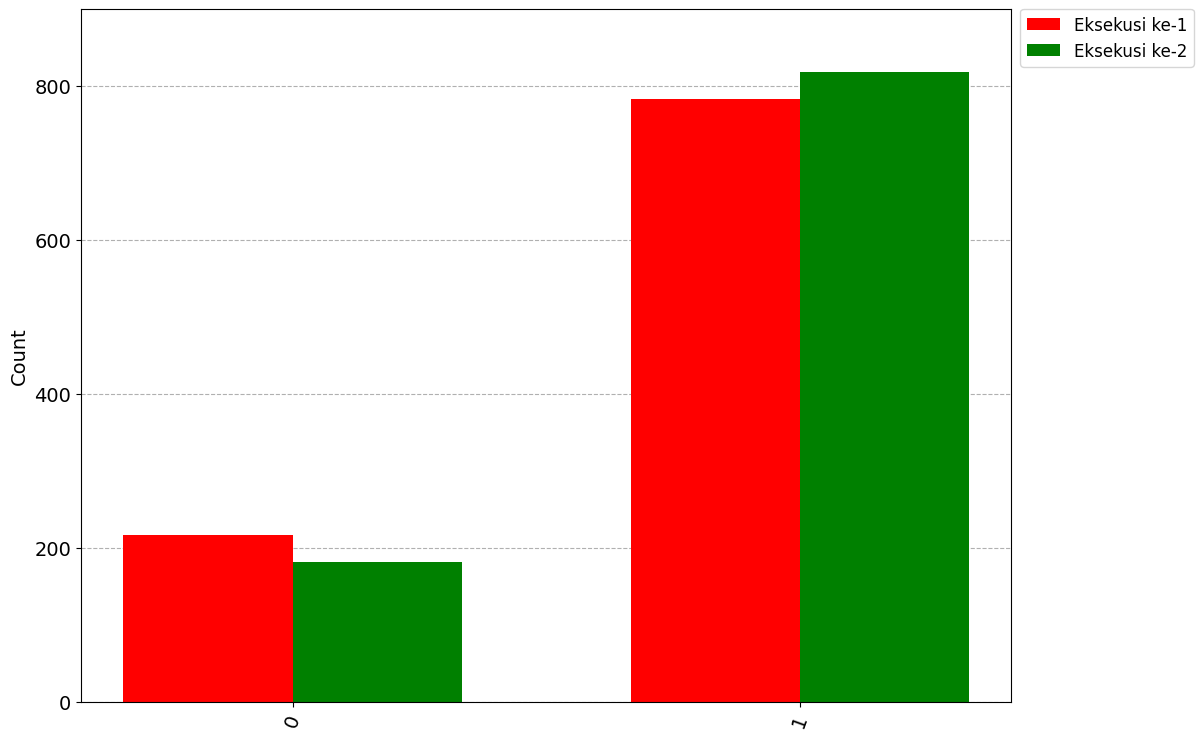

In [9]:
# Eksekusi ke dua
statistics2  = q.sample_counts(1000)
# Plot results with legend
legend = ['Eksekusi ke-1', 'Eksekusi ke-2']
plot_histogram([statistics1, statistics2], legend=legend, sort='asc', figsize=(12,9),
               color=['red', 'green'], bar_labels=False)  # sort='desc' or 'asc'

## Operasi Qubit tunggal dengan Operator¶

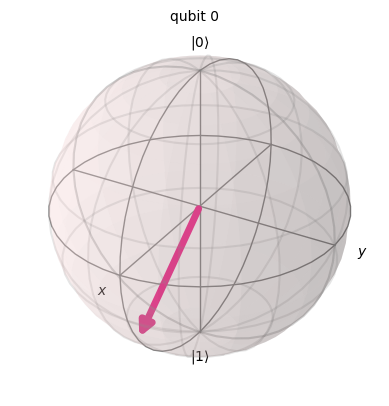

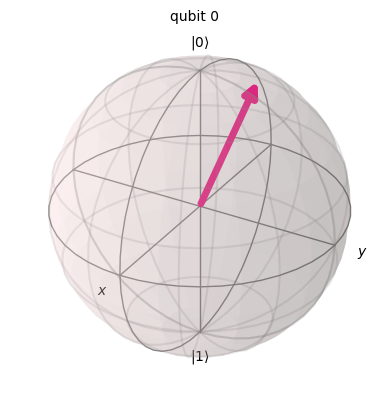

Qubit asli q1:


<IPython.core.display.Latex object>

probabilitas status |0> =  0.2
probabilitas status |1> =  0.8

Qubit Hasil Operasi q2:


<IPython.core.display.Latex object>

probabilitas status |0> =  0.8
probabilitas status |1> =  0.2


In [10]:
from qiskit.quantum_info import Operator, Pauli
# Operator Pauli (I, X, Y, Z)
I = Operator([ [1,0],
               [0,1] ])

X = Operator([ [0,1],
               [1,0] ])

Y = Operator([ [0,-1.j],
               [1.j,0] ])

Z = Operator([ [1,0],
               [0,-1] ])

# Operator Hadamard
H = 1/sqrt(2)* Operator([ [1, 1],
                          [1,-1] ])

# Operator Phase
#Theta = np.pi
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

# Qubit awal q1
q1 = Statevector([1/sqrt(5), 2/sqrt(5)]) # Prob |0> = 1/5      prob |1> = 4/5
probs1 = q1.probabilities()
display(plot_bloch_multivector(q1))
# Operasi Qubit q1 dengan operator Hadamard  q2 = H(q1)  
q2 = q1.evolve(Y)
probs2 = q2.probabilities()
display(plot_bloch_multivector(q2))
print('Qubit asli q1:')
display(q1.draw('latex'))
print('probabilitas status |0> = ',np.round(probs1[0],1))
print('probabilitas status |1> = ',np.round(probs1[1],1))
print()
print('Qubit Hasil Operasi q2:')
display(q2.draw('latex'))
print('probabilitas status |0> = ',np.round(probs2[0],1))
print('probabilitas status |1> = ',np.round(probs2[1],1))

## Komposisi operasi

In [11]:
# Psi=XHY(q)

# Status Qubit awal
q1 = Statevector([3*sqrt(10)/10, -sqrt(10)/10]) # Prob |0> = 0.9      prob |1> = 0.1
probs1 = q1.probabilities()
'''
# Cara 1
q2 = ((q1.evolve(Y)).evolve(H)).evolve(X)
probs2 = q2.probabilities()

'''
# cara 2
q2 = q1.evolve(Y)
q2 = q2.evolve(H)
q2 = q2.evolve(X)


print('Qubit asli:')
display(q1.draw('latex'))
print('probabilitas status |0> = ',np.round(probs1[0],1))
print('probabilitas status |1> = ',np.round(probs1[1],1))
print()
print('Qubit Hasil Operasi:')
display(q2.draw('latex'))
print('probabilitas status |0> = ',np.round(probs2[0],1))
print('probabilitas status |1> = ',np.round(probs2[1],1))

Qubit asli:


<IPython.core.display.Latex object>

probabilitas status |0> =  0.9
probabilitas status |1> =  0.1

Qubit Hasil Operasi:


<IPython.core.display.Latex object>

probabilitas status |0> =  0.8
probabilitas status |1> =  0.2


## Superposisi

In [12]:
# qubit semula dalam keadaan basis |0>
q1 = Statevector([1, 0])   # q = |0>   
# Terapkan operator Hadamard H
q2 = q1.evolve(H)

print('Qubit awal')
display(q1.draw('text'))
print()
print('Hasil Superposisi')
display(q2.draw('latex'))

Qubit awal


[1.+0.j,0.+0.j]


Hasil Superposisi


<IPython.core.display.Latex object>

In [13]:
q1 = Qubit('101')
q2 = H(0)*q1      #operator H bekerja pada Qubit ke-0;  H|1> |01>

Psi1 = qapply(q1)
display(Psi1)
print()
Psi2 = qapply(q2)
display(Psi2)
measure_all(Psi2)


QiskitError: 'other is not a number'

In [ ]:
q1 = Qubit('101')

# operasi Z|1> Y|0> X|1>
Psi_1 = H(2)*Y(1)*Z(0)*q1
Psi_1 = qapply(Psi_1)
display(Psi_1)
measure_all(Psi_1)